In [ ]:
import pandas as pd
import random 
import numpy as np

customers_bank = [f"c_{i}" for i in range(1, 16)]
ids_bank = [f"id_{i}" for i in range(1, 16)]

d_bank = dict(zip(ids_bank, customers_bank))
ids = random.choices(list(d_bank.keys()), k=50)
customers = [d_bank[i] for i in ids]

days = [random.randint(1, 28) for i in range(50)]
mon = [random.randint(1, 12) for i in range(50)]
val = [round(random.uniform(-15.00, 15.00), 2) for i in range(50)] # no randfloat

data = {
    "customer_name" : customers  ,
    "customer_id" : ids,
    "day" : days, 
    "month":  mon,
    "value" : val

}

data = pd.DataFrame(data)
print (data.head())

data.to_csv("daily_entries.csv", index = False)


In [ ]:
def groupby_month(df):
    monthly_sum = df.groupby(["customer_name", "customer_id","month"])["value"].sum()
    print(monthly_sum)
    return monthly_sum.reset_index()

monthly_df =groupby_month(data)
monthly_df.to_csv("monthly_balances.csv", index = False)


# group all data for month

In [38]:
def add_nan(df):
    temp = df.copy()
    for i in range(int(0.1*df.size)):
        row = random.randint(0, df.shape[0]-1)
        col = random.randint(0, df.shape[1]-1)
        temp.iat[row, col] = np.nan
    return temp
data_with_nan = add_nan(data)
data_with_nan.to_csv("daily_entries_2.csv", index = False)


# make anoher dataset

In [43]:
def updating_csv(csv1, csv2 = "monthly_balances.csv"):
    df1 = pd.read_csv(csv1)

    x = groupby_month(df1)

    x.to_csv(csv2, index = False)

    return x

#updating monthlybal with another dataset

def combine_df(csv1, csv2):
    df1 = pd.read_csv(csv1)
    df2 = pd.read_csv(csv2)

    combined = pd.concat ([df1, df2], ignore_index=True)
    combined.to_csv("daily_entries_total.csv", index = False)

    return combined 


x = updating_csv("daily_entries_2.csv", "monthly_balances.csv")

cdf = combine_df("daily_entries.csv", "daily_entries_2.csv")




print(cdf)
    

customer_name  customer_id  month
c_1            id_1         3.0       6.95
                            5.0       9.06
c_10           id_10        1.0       0.00
                            12.0     10.02
c_12           id_12        6.0       0.00
                            11.0    -12.43
c_13           id_13        3.0      -9.40
                            4.0       7.92
c_14           id_14        1.0     -11.12
                            2.0     -10.85
                            3.0     -11.71
                            5.0       1.17
                            8.0      11.86
                            11.0     12.40
                            12.0     14.52
c_15           id_15        3.0     -11.28
                            7.0       5.86
                            9.0      -4.16
c_2            id_2         1.0      -6.64
                            2.0       4.68
c_3            id_3         11.0     10.18
c_4            id_4         10.0      6.12
c_5            id_5 

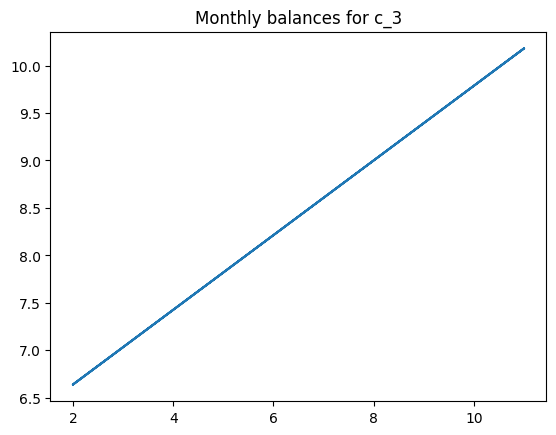

In [ ]:
# yet to fix plotting. ignore below 
# yet to do part 4, UML


import matplotlib.pyplot as plt
customer = "c_3"
x = pd.read_csv("data_entries_total.csv")
find = x["customer_name"] == customer
customer_data = x[find]
fix, ax = plt.subplots()
ax.plot(customer_data["month"], customer_data["value"])

ax.set_title(f"Monthly balances for {customer}")
plt.show()